x ->  (40956, 48) y -> (40956,)
x_train ->  (32764, 48) y_train -> (32764,)
x_test ->  (8192, 48) y_test -> (8192,)
KNearest Neighbour: 
Confusion Matrix [[718   0   0   0   0  19   0   0   2   0   0]
 [  0 750   0   0   0   0   0   0   0  14   0]
 [  0   0 738   0   3   0   0   1   0   0   0]
 [  0   0   1 755   3   0   0   1   0   0   0]
 [  0   0   0   4 735   0   0   8   0   0   0]
 [ 14   0   0   0   0 724   0   0   9   0   0]
 [  0   0   0   0   0   0 724   0   0   0   0]
 [  0   0   0   0   1   2   0 747   0   0   0]
 [  1   2   1   0   0  12   0   1 741   0   0]
 [  0  13   0   0   0   0   0   0   0 676   0]
 [  0   0   0   0   0   0   0   0   0   0 772]]
Accuracy:  0.986328125
Precision:  0.986318093971705
Recall:  0.9862853983754861
-------------------------------------------------------------------------
 
Kmeans Classifier:
list of clusters: [array([[0.5958627 , 0.5452845 , 0.6452714 , ..., 0.26344828, 0.29149233,
        0.25471698],
       [0.59599097, 0.54500524, 0.64385

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Classification using Logistic Regression:
              precision    recall  f1-score   support

           1       0.85      0.94      0.90       739
           2       0.85      0.85      0.85       764
           3       0.84      0.95      0.89       742
           4       0.94      0.89      0.92       760
           5       0.80      0.71      0.75       747
           6       0.67      0.67      0.67       747
           7       0.98      0.99      0.98       724
           8       0.84      0.86      0.85       750
           9       0.78      0.69      0.73       758
          10       0.82      0.84      0.83       689
          11       1.00      1.00      1.00       772

    accuracy                           0.85      8192
   macro avg       0.85      0.85      0.85      8192
weighted avg       0.85      0.85      0.85      8192

Accuracy:  0.8544921875
Precision:  0.8531819963715793
Recall:  0.854680055922866
---------------------------------------------------------------

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Classification using Ensemble Model:
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       739
           2       0.90      0.99      0.94       764
           3       0.97      1.00      0.98       742
           4       0.99      0.99      0.99       760
           5       0.96      0.96      0.96       747
           6       0.82      0.97      0.89       747
           7       1.00      1.00      1.00       724
           8       0.98      0.96      0.97       750
           9       0.98      0.77      0.87       758
          10       0.99      0.88      0.93       689
          11       1.00      1.00      1.00       772

    accuracy                           0.96      8192
   macro avg       0.96      0.96      0.96      8192
weighted avg       0.96      0.96      0.96      8192

Accuracy:  0.95556640625
Precision:  0.9596359585429081
Recall:  0.9551738870901041
------------------------------------------------------------------

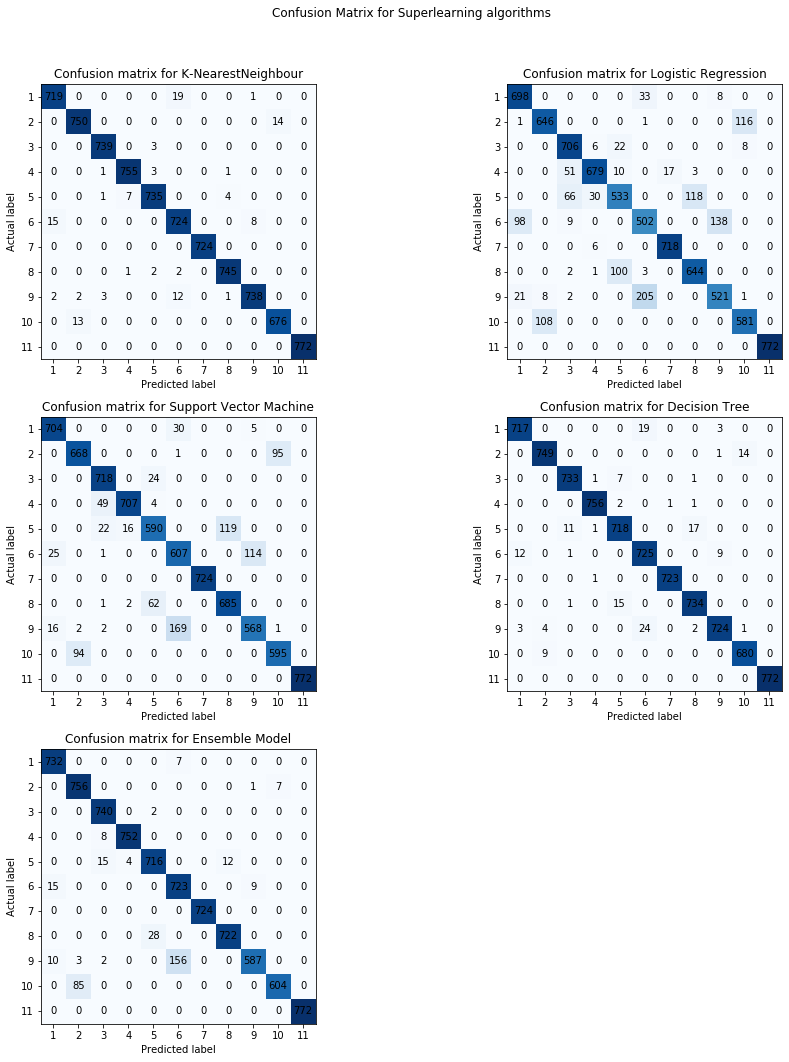

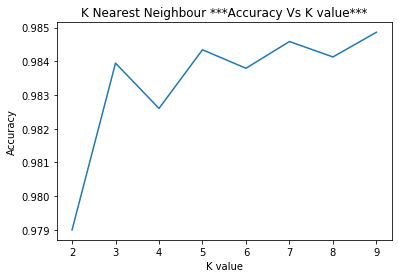

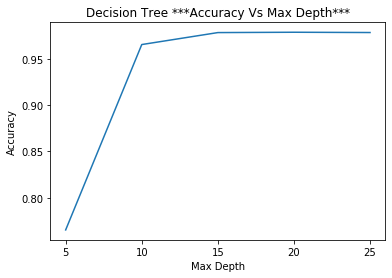

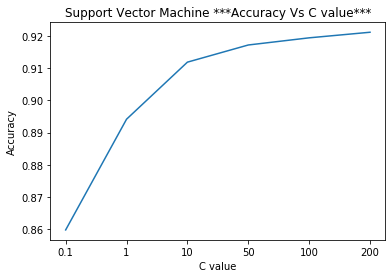

In [0]:
   # -*- coding: utf-8 -*-
"""
Predicitve_Analytics.py
"""

# Import pandas 
%matplotlib inline
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import VotingClassifier

def Accuracy(y_true,y_pred):
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    
    """
    accuracy = (y_test == y_pred).sum() / float(len(y_test))
    return accuracy

def Recall(y_true,y_pred):
    cm = ConfusionMatrix(y_true,y_pred)
    recall = np.diag(cm) / np.sum(cm, axis = 1)
    recall = np.mean(recall)
    return recall

def Precision(y_true,y_pred):
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    """
    cm = ConfusionMatrix(y_true,y_pred)
    precision = np.diag(cm) / np.sum(cm, axis = 0)
    precision = np.mean(precision)
    return precision


def WCSS(Clusters,Centroids):
    """
    :Clusters List[numpy.ndarray]
    :rtype: float
    """
    wcss = []
    total = 0.0
    for clus in range(len(Centroids)):
        val = 0.0
        dis_square = 0.0
        for i in range(len(Clusters[clus])):
                distances = (np.linalg.norm(Clusters[clus][i] - Centroids[clus]))
                dis_square = distances * distances
                val = val + dis_square
              
        wcss.append(val)
    return sum(wcss)
    
def ConfusionMatrix(y_true,y_pred):
    
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    """  
    n = len(np.unique(y))
    sum = np.add(y_test * n, y_pred.astype('int'))
    a = np.bincount(sum)
    matrix = np.delete(a, range(np.min(sum))).reshape(n, n)
    return matrix

def KNN(X_train,X_test,Y_train, k):
    n = len(X_test)
    dists = np.zeros((n, len(X_train)))
    y_pred = np.zeros(n)
    dists = np.sqrt((X_test**2).sum(axis=1)[:, np.newaxis] + (X_train**2).sum(axis=1) - 2 * X_test.dot(X_train.T))
  
    for i in range(n):
       k_neighbour = []
       index_arr = np.argsort(dists[i, :], axis = 0)
       k_neighbour = Y_train[index_arr[:k]].tolist()
       y_pred[i] = (max(set(k_neighbour), key = k_neighbour.count))
  
    return y_pred

def normalize(df):
    result = df.copy()
    for column in df.columns:
        max_value = df[column].max()
        min_value = df[column].min()
        result[column] = (df[column] - min_value) / (max_value - min_value)
    return result

class Node:
    def __init__(self,predicted_class):
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

class DecisionTreeClassifier:

    def _predict(self, inputs):
        node = self.tree_
        while (node.left or node.right):
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class


    #def predict(self, X):
      #for i in X.values:
       # for 

      #return [self._predict(inputs) for inputs in X]
    
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, sample_data):
        self.tree_ = self.Decision_Tree(sample_data)

    def calculate_gini(self,node,y):
      classes,class_numbers=np.unique(y[node],return_counts=True)
      p=(class_numbers/class_numbers.sum())
      return 1-sum(np.power(p,2))   

    def Decision_Tree(self,sample_data,depth=0):

      y=sample_data[0]
      best_gini=999999
      node= Node(np.argmax(np.bincount(y.values))) 
      
      if depth<self.max_depth: 
        if(len(y.values)<=1):
          index=None
          split=None 
        else:
          for key,value in sample_data.iteritems():
            if(key!=0):
              
              sorted_index=np.argsort(value.values)
              ordered_x,ordered_y=value.values[sorted_index],y.values[sorted_index]
              mean_x=np.mean(list(zip(ordered_x,ordered_x[1:])),axis=1)
              
              for m in mean_x: 
                left= np.where(ordered_x <=m )
                right= np.where(ordered_x >m)

                right_len=np.array(right).shape[1]
                left_len=np.array(left).shape[1]

                left_gini=self.calculate_gini(np.asarray(left),ordered_y)
                left_gini= (left_len/(right_len+left_len))*left_gini

                right_gini=self.calculate_gini(np.asarray(right),ordered_y)
                right_gini= (right_len/(right_len+left_len))*right_gini

                total_gini=left_gini+right_gini

                if total_gini < best_gini:
                  next_sample=sample_data.sort_values(axis=0,by=key)
                  next_sample=sample_data.drop(columns=key)
                  best_gini=total_gini
                  index=key
                  left_sample= next_sample.iloc[left]
                  right_sample= next_sample.iloc[right]
                  split_value = m

        if(best_gini!=0):
          if index is not None:
              node.feature_index = index
              node.threshold = split_value
              node.left = self.Decision_Tree(left_sample, depth+ 1)
              node.right = self.Decision_Tree(right_sample, depth+ 1)
            
      return node

def RandomForest(X_train,Y_train,X_test):
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray"""
    forest=[]
    i=0
    features_name=[]
    prediction=[]
    final_prediction=[]
    features=int(np.round(np.sqrt(X_train.shape[1])))
    tree1=[]
    tree=[]
    while(i<10):
      i=i+1 
      sample_data = pd.DataFrame(X_train,columns=np.arange(1,x_train.shape[1]+1)).sample(n=features,replace=False,axis=1)
      features_name.append(sample_data.columns)
      sample_data = sample_data.join(pd.DataFrame(Y_train),on=sample_data.index)
      sample_data = (sample_data.sample(n=sample_data.shape[0],replace=True))
      classifier= DecisionTreeClassifier(4)
      classifier.fit(sample_data)
      forest.append(classifier)

    for x1 in x_test: 
      for f in forest:
        prediction.append(f._predict(x1))
      final_prediction.append(np.argmax(np.bincount(prediction)))

    return final_prediction
    
    
def PCA(X_train,N):
    """
    :type X_train: numpy.ndarray
    :type N: int
    :rtype: numpy.ndarray
    """

    mean = np.mean(X_train)
    X_train_std = X_train - mean
    cov_matrix = np.cov(X_train_std.T)

    eigen_value, eigen_vector = np.linalg.eig(cov_matrix)
    eigen_pair = [(np.abs(eigen_value[i]), eigen_vector[:, i]) for i in range(len(eigen_value))]
    eigen_pair.sort(key=lambda k: k[0], reverse=True)
    res = [eigen_pair[i][1][:, np.newaxis] for i in range(N)]

    w = np.hstack(res)
    X_train_pca = X_train_std.dot(w)

    print(X_train_pca.shape, X_train_pca)
    return X_train_pca;

def Kmeans(X_train,N):
    """
    :type X_train: numpy.ndarray
    :type N: int
    :rtype: List[numpy.ndarray]
    """

    n = len(X_train)
    centroids = X_train[np.random.choice(X_train.shape[0], size = N, replace= False),:]
    centers_old = np.zeros(centroids.shape) # to store old centers
    previous_centroids = centroids.copy() # Store new centers

    clusters = np.zeros(n)
    distances = np.zeros((n,N))

    samecluster = False
    while (not samecluster):
        clusternew = []
        for i in range(N):
            distances[:,i] = np.linalg.norm(X_train - centroids[i], axis=1)
        clusters = np.argmin(distances, axis = 1)
      
        
        new_centroids = previous_centroids.copy()
        for i in range(N):
            previous_centroids[i] = np.mean(X_train[clusters == i], axis=0)
            clusternew.append(X_train[clusters == i])

        samecluster = np.array_equal(previous_centroids, new_centroids)
    return clusternew,clusters,new_centroids
        

def SklearnSupervisedLearning(X_train,Y_train,X_test, Y_test):
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    
    :rtype: List[numpy.ndarray] 
    """
    y_pred_list = []
    classifier = KNeighborsClassifier(n_neighbors=3)  
    classifier.fit(X_train, Y_train)

    y_pred = classifier.predict(X_test) 
    y_pred_list.append(y_pred)

    print("Sklearn Supervised Learning:")
    print("Classification using K-nearest Neighbours:")
    print(classification_report(Y_test, y_pred))
    print("Accuracy: ", Accuracy(Y_test, y_pred))
    print("Precision: ", Precision(Y_test, y_pred))
    print("Recall: ", Recall(Y_test, y_pred))
    print("--------------------------------------------------------------------------")

    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    y_pred_list.append(y_pred)
    

    print("Classification using Logistic Regression:")
    print(classification_report(Y_test, y_pred))
    print("Accuracy: ", Accuracy(Y_test, y_pred))
    print("Precision: ", Precision(Y_test, y_pred))
    print("Recall: ", Recall(Y_test, y_pred))
    print("--------------------------------------------------------------------------")

    classifier = svm.SVC(kernel='linear')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    y_pred_list.append(y_pred)   
    
    print("Classification using Support Vector Machine:")
    print(classification_report(Y_test, y_pred))
    print("Accuracy: ", Accuracy(Y_test, y_pred))
    print("Precision: ", Precision(Y_test, y_pred))
    print("Recall: ", Recall(Y_test, y_pred))
    print("--------------------------------------------------------------------------")

    classifier = tree.DecisionTreeClassifier()
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    y_pred_list.append(y_pred)   

    print("Classification using Decision Tree:")
    print(classification_report(Y_test, y_pred))
    print("Accuracy: ", Accuracy(Y_test, y_pred))
    print("Precision: ", Precision(Y_test, y_pred))
    print("Recall: ", Recall(Y_test, y_pred))
    print("-------------------------------------------------------------------------")

    print('SklearnVotingClassifier:')
    voting_pred = SklearnVotingClassifier(x_train,y_train,x_test, y_test)

    cm1 = ConfusionMatrix(y_test, y_pred_list[0])
    cm2 = ConfusionMatrix(y_test, y_pred_list[1])
    cm3 = ConfusionMatrix(y_test, y_pred_list[2])
    cm4 = ConfusionMatrix(y_test, y_pred_list[3])
    cm5 = ConfusionMatrix(y_test, voting_pred)
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(14,14))
    fig.suptitle('Confusion Matrix for Superlearning algorithms', y=1.05)
    plotConfusionMatrix(ax1, cm1, y_test, 'K-NearestNeighbour')
    plotConfusionMatrix(ax2, cm2, y_test, 'Logistic Regression')
    plotConfusionMatrix(ax3, cm3, y_test, 'Support Vector Machine')
    plotConfusionMatrix(ax4, cm4, y_test, 'Decision Tree')
    plotConfusionMatrix(ax5, cm5, y_test, 'Ensemble Model')

    ax6.remove()
    fig.tight_layout()
    fig.show()
    fig.savefig("confusion-matrix.png")
    print("-------------------------------------------------------------------------")
    return y_pred_list

def SklearnVotingClassifier(X_train,Y_train,X_test, Y_test):
    
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    
    :rtype: List[numpy.ndarray] 
    """
    lr_model = LogisticRegression(random_state=0)
    dt_model = tree.DecisionTreeClassifier(random_state=1)
    svm_model = svm.SVC()
    knn_model = KNeighborsClassifier(n_neighbors=3)  


    model = VotingClassifier(estimators=[('lr', lr_model), ('dt', dt_model), ('svm', svm_model), 
                                        ('knn', knn_model)], voting='hard')
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)

    score = model.score(X_test,Y_test)
    print("Classification using Ensemble Model:")
    print(classification_report(Y_test, y_pred))
    print("Accuracy: ", Accuracy(Y_test, y_pred))
    print("Precision: ", Precision(Y_test, y_pred))
    print("Recall: ", Recall(Y_test, y_pred))

    return y_pred

"""
Create your own custom functions for Matplotlib visualization of hyperparameter search. 
Make sure that plots are labeled and proper legends are used
"""

def normalize(df):
    result = df.copy()
    for column in df.columns:
        max_value = df[column].max()
        min_value = df[column].min()
        result[column] = (df[column] - min_value) / (max_value - min_value)
    return result

def plotConfusionMatrix(ax, cm, y_test, title):
  ax.imshow(cm, cmap='Blues')
  ax.set_title('Confusion matrix for ' + title, size = 12)
  ticks = np.arange(max(y_test))
  labels = np.arange(min(y_test), max(y_test)+1)
  ax.set_xticks(ticks)
  ax.set_xticklabels(labels)
  ax.set_yticks(ticks)
  ax.set_yticklabels(labels)
  ax.set_ylabel('Actual label', size = 10)
  ax.set_xlabel('Predicted label', size = 10)
  width, height = len(cm), len(cm)
  for x in range(width):
    for y in range(height):
        ax.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center', color="black")

def gridSearch(X_train, Y_train,X_test,Y_test):
    from sklearn.model_selection import GridSearchCV 
    from sklearn import svm
    from sklearn import tree
    from sklearn.neighbors import KNeighborsClassifier




    ###grid search for KNN
    parameters = {'n_neighbors':[2,3,4,5,6,7,8,9]}  
    gridvalues = GridSearchCV(KNeighborsClassifier(), parameters, refit = True,scoring="accuracy") 
    gridvalues.fit(X_train, Y_train) 
    #print(gridvalues.cv_results_) 
    y_pred = gridvalues.predict(X_test)
    cm1 = ConfusionMatrix(Y_test, y_pred)

    accuracy = gridvalues.cv_results_['mean_test_score']
    para = parameters['n_neighbors']
    plt.figure()
    plt.title('K Nearest Neighbour ***Accuracy Vs K value***')
    plt.xlabel("K value")
    plt.ylabel("Accuracy")

    plt.xticks(np.arange(8),np.arange(2,10))
    plt.plot(accuracy)
    #print(max(accuracy))
    #print(accuracy)
    plt.show()

    ###grid search for decision tree
    parameters = {'criterion':['gini'],
                  'max_depth':[5,10,15,20,25]}
                  
    gridvalues = GridSearchCV(tree.DecisionTreeClassifier(),parameters, refit = True,scoring="accuracy") 
    gridvalues.fit(X_train, Y_train) 
    y_pred = gridvalues.predict(X_test)
    cm2 = ConfusionMatrix(Y_test, y_pred)

    accuracy = gridvalues.cv_results_['mean_test_score']
    para = parameters['max_depth']
    #print('accuracy:',accuracy)
    #print('parameter',para)
    plt.figure()
    plt.title('Decision Tree ***Accuracy Vs Max Depth***')
    plt.xlabel("Max Depth")
    plt.ylabel("Accuracy")

    plt.xticks(np.arange(5),para)
    plt.plot(accuracy)
    plt.savefig("Grid_search_decision_tree")
    plt.show()

    ###grid search for SVM
    parameters = {'C': [0.1, 1, 10, 50, 100, 200], 
                  'kernel': ['linear']}  
    gridvalues = GridSearchCV(svm.SVC(), parameters, refit = True) 
    gridvalues.fit(X_train, Y_train) 
    y_pred = gridvalues.predict(X_test)
    cm3 = ConfusionMatrix(Y_test, y_pred)

    accuracy = (gridvalues.cv_results_['mean_test_score'])
    para = parameters['C']
    plt.figure()
    plt.title('Support Vector Machine ***Accuracy Vs C value***')
    plt.xlabel("C value")
    plt.ylabel("Accuracy")
    plt.xticks(np.arange(6),para)
    plt.plot(accuracy)
    plt.savefig("Grid_search_svm")
    plt.show()
    figure,(axis1,axis2,axis3) = plt.subplots(1,3, figsize=(14,14))
    figure.suptitle('Confusion Matrix for Grid Search')
    plotConfusionMatrix(axis1, cm1, y_test, 'K-NearestNeighbour')
    plotConfusionMatrix(axis2, cm2, y_test, 'Support Vector Machine')
    plotConfusionMatrix(axis3, cm3, y_test, 'Decision Tree')
    figure.tight_layout()
    figure.show()
    

if __name__== "__main__":
     # reading csv file  
    pf = pd.read_csv("data.csv")
    
    #dropping first column and label
    y = pf.iloc[:,-1]
    
    x=pf.iloc[:, :-1]
    num_of_class = np.unique(y)

    x = normalize(x)
    # partitioning dataset into train, validate and test dataset
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
    
    
    x_train = x_train.values
    y_train = y_train.values
    x_test = x_test.values
    y_test = y_test.values
    print('x -> ', x.shape, 'y ->', y.shape)
    print('x_train -> ', x_train.shape, 'y_train ->', y_train.shape)
    
    print('x_test -> ', x_test.shape, 'y_test ->', y_test.shape)

    
    print("KNearest Neighbour: ")
    knn_y_pred = KNN(x_train,x_test,y_train, 3)
    knn_confusion_matrix = ConfusionMatrix(y_test, knn_y_pred)
    print("Confusion Matrix", knn_confusion_matrix)
    print("Accuracy: ", Accuracy(y_test, knn_y_pred))
    print("Precision: ", Precision(y_test, knn_y_pred))
    print("Recall: ", Recall(y_test, knn_y_pred))
    print("-------------------------------------------------------------------------")
    print(" ")


    print("Kmeans Classifier:")
    listofclusters,clusterlabels,centroids = Kmeans(x_train,11)
    print("list of clusters:",listofclusters)
    print("cluster labels:",clusterlabels)

    print("--------------------------------------------------------------------------")

    print("Within cluster sum of square of distances:")
    total = WCSS(listofclusters,centroids)
    print("Error:",total)

    print("--------------------------------------------------------------------------")
    print("PCA: ")
    pca_x_train = PCA(x_train, 2)
    print("X_train shape: ", x_train.shape)
    print("Reduced X_train shape: ", pca_x_train.shape)
    print(pca_x_train)

    print("--------------------------------------------------------------------------")
    print('SklearnSupervisedLearning:')
    y_pred_list = SklearnSupervisedLearning(x_train,y_train,x_test, y_test)
    print("-------------------------------------------------------------------------")
    gridSearch(x_train, y_train, x_test, y_test)


    prediction=RandomForest(x_train,y_train,x_test)


    
